In [5]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from DS_data_transformation import get_prm

In [6]:
dirname = '/home/rt2122/Data/cur/recall2epoch/'
files = next(os.walk(dirname))[-1]
pz_files = [s for s in files if s[:len('pz_ep')] == 'pz_ep']

In [7]:
def extract_recall(df, catalogs = ['planck_z', 'planck_no_z', 'mcxcwp', 'act'], with_fp=True):
    import numpy as np
    line = {}
    for cat in catalogs:
        cur = df[df['catalog'] == cat]
        line[cat] = np.count_nonzero(cur['status'] == 'tp') / len(cur)
    if with_fp:
        line['fp'] = np.count_nonzero(df['status'] == 'fp')
    return line

In [11]:
pz_df = []
for file in pz_files:
    df = pd.read_csv(os.path.join(dirname, file))
    line = extract_recall(df)
    pz_df.append(pd.DataFrame(line, index=[int(get_prm('ep', file))]))
pz_df = pd.concat(pz_df).sort_index()

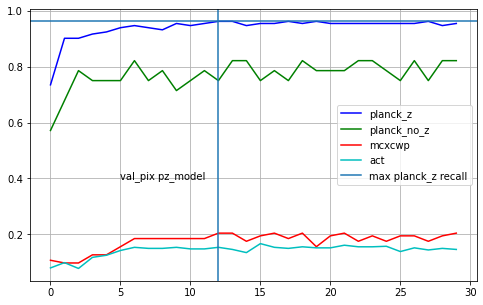

In [43]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
for cat, c in zip(['planck_z', 'planck_no_z', 'mcxcwp', 'act'], 'bgrc'):
    line, = ax.plot(np.arange(0, 30), pz_df[cat], c=c)
    line.set_label(cat)
    
line = ax.axvline(np.array(pz_df['planck_z']).argmax())
line.set_label('max planck_z recall')
line = ax.axhline(np.array(pz_df['planck_z']).max())
ax.text(5, 0.4, 'val_pix pz_model')
ax.grid()
ax.legend()

max_recall epochs [12 13 17 19 27]


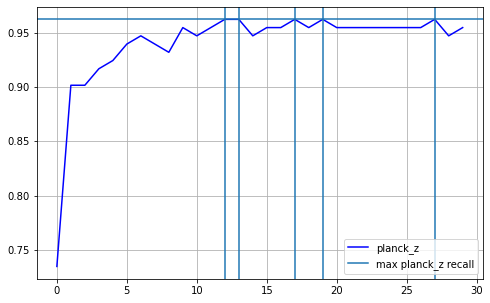

In [41]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
for cat, c in zip(['planck_z'], 'b'):
    line, = ax.plot(np.arange(0, 30), pz_df[cat], c=c)
    line.set_label(cat)
    
m = np.array(pz_df['planck_z']).max()
mm = np.where(np.array(pz_df['planck_z'] == m))[0]
print('max_recall epochs', mm)
[ax.axvline(k) for k in mm]
line = ax.axhline(m)
line.set_label('max planck_z recall')
ax.grid()
ax.legend()

min_fp epochs [2]


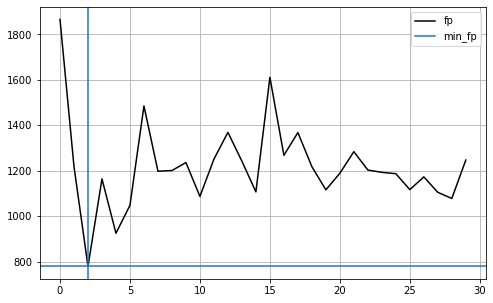

In [47]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
for cat, c in zip(['fp'], 'k'):
    line, = ax.plot(np.arange(0, 30), pz_df[cat], c=c)
    line.set_label(cat)
    
m = np.array(pz_df['fp']).min()
mm = np.where(np.array(pz_df['fp'] == m))[0]
print('min_fp epochs', mm)
[ax.axvline(k) for k in mm]
line = ax.axhline(m)
line.set_label('min_fp')
ax.grid()
ax.legend()